# 1) Delivery_time -> Predict delivery time using sorting time 


In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 150
sns.set_style('darkgrid')

In [3]:
d_time = pd.read_csv("delivery_time.csv")

In [4]:
d_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
d_time = d_time.rename(columns={
    'Delivery Time':'Delivery_Time',
    'Sorting Time' :'Sorting_Time'
})

In [6]:
d_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
d_time.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [8]:
d_time.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

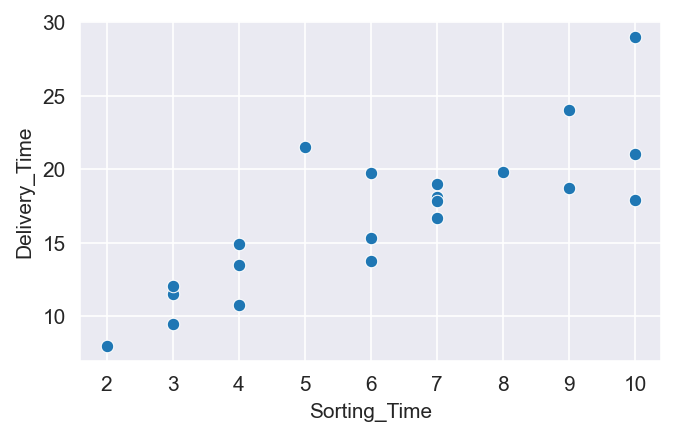

In [9]:
sns.scatterplot(x = 'Sorting_Time', y = 'Delivery_Time', data= d_time)

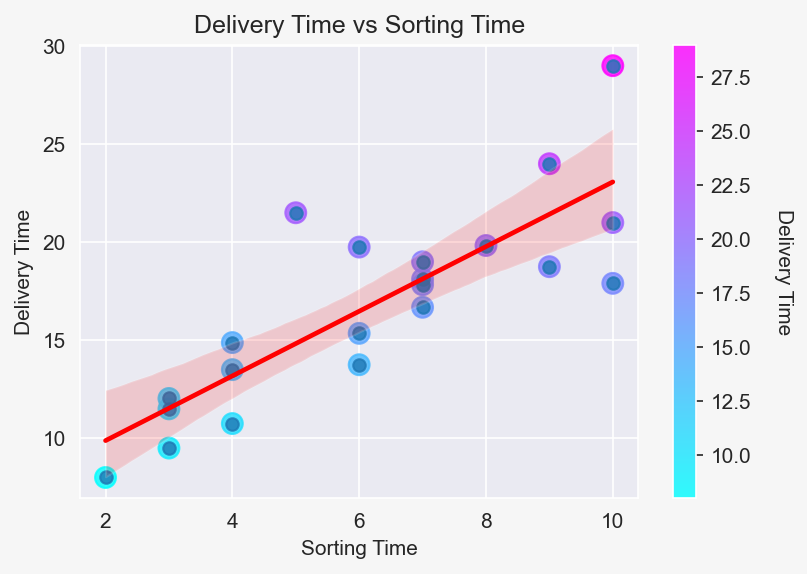

In [10]:
fig, ax = plt.subplots(figsize=(6, 4), facecolor='#f6f6f6')

scatter = ax.scatter(x='Sorting_Time', y='Delivery_Time', data=d_time, s=100, c=d_time['Delivery_Time'], cmap='cool', alpha=0.8)
sns.regplot(x='Sorting_Time', y='Delivery_Time', data=d_time, line_kws={'color': 'red'}, ax=ax)

cbar = plt.colorbar(scatter)
cbar.set_label('Delivery Time', rotation=270, labelpad=20)

ax.set_xlabel('Sorting Time')
ax.set_ylabel('Delivery Time')
ax.set_title('Delivery Time vs Sorting Time')

plt.show()

<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

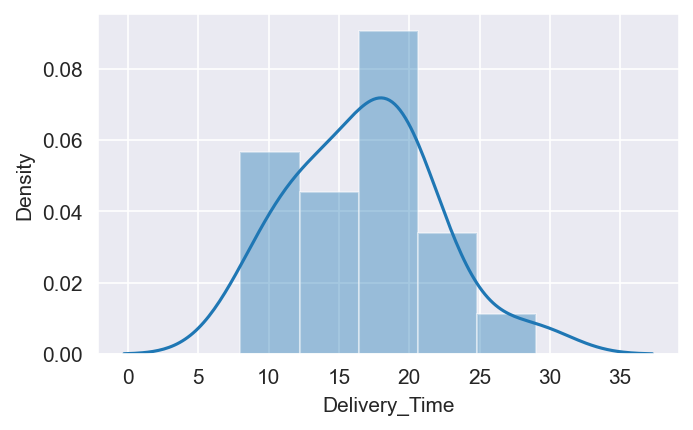

In [11]:
sns.distplot(d_time['Delivery_Time'])

In [12]:
d_time['Delivery_Time'].skew()

0.3523900822831107

In [13]:
d_time['Sorting_Time'].skew()

0.047115474210530174

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

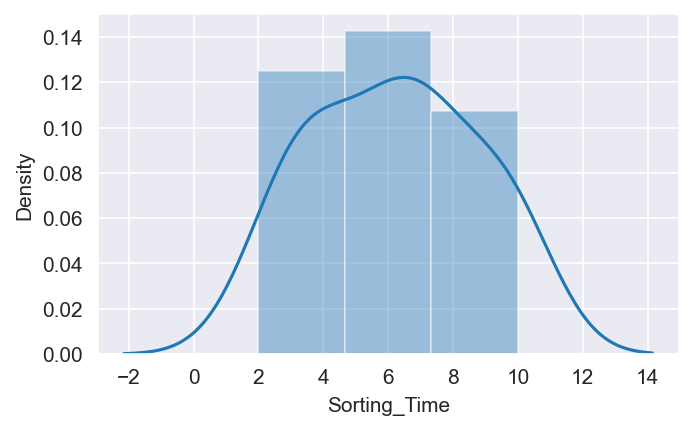

In [14]:
sns.distplot(d_time['Sorting_Time'])

<AxesSubplot:>

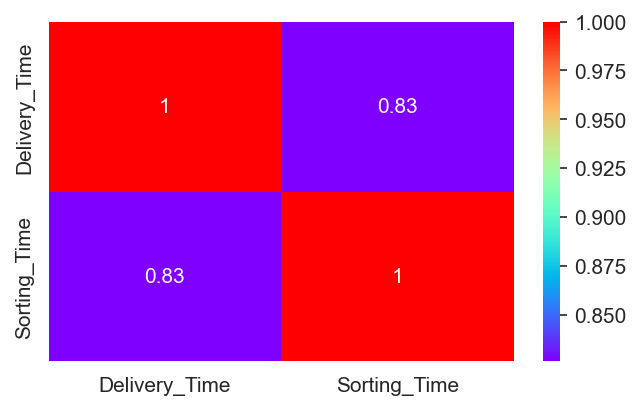

In [15]:
sns.heatmap(d_time.corr(), annot=True, cmap='rainbow')

In [16]:
d_time.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

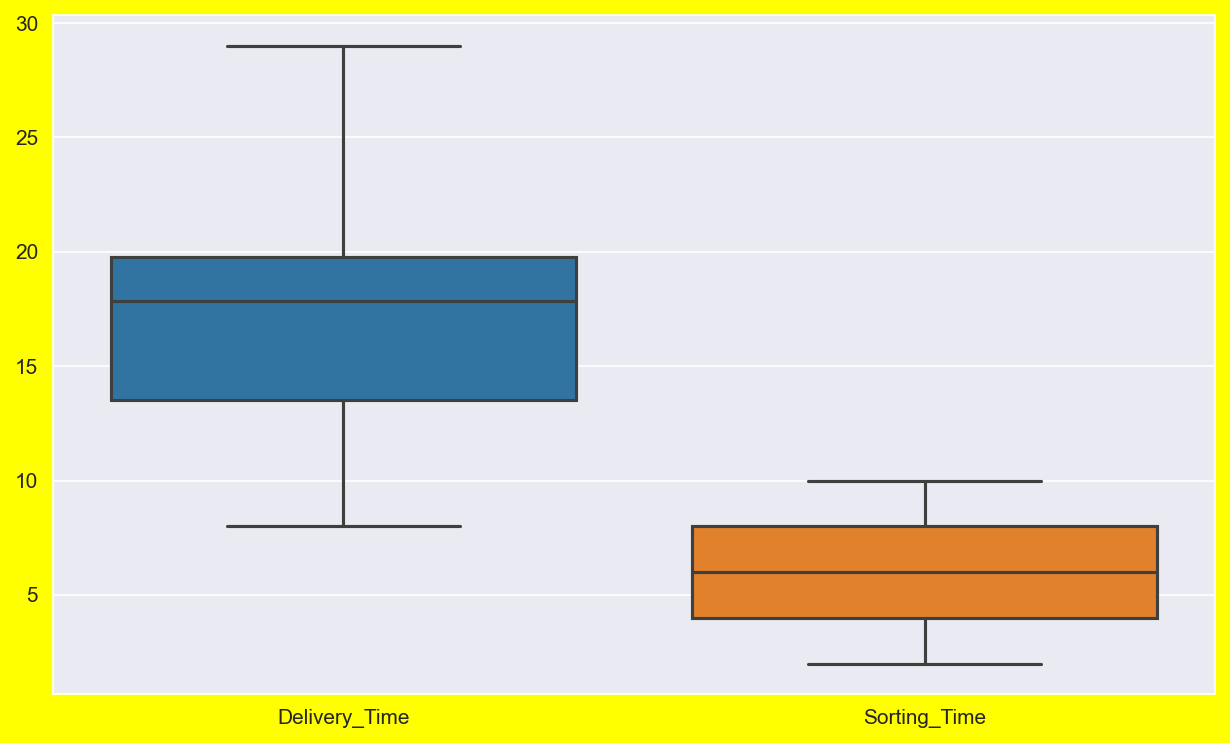

In [17]:
plt.figure(figsize=(10,6), facecolor="yellow")
sns.boxplot(data = d_time)
plt.show()

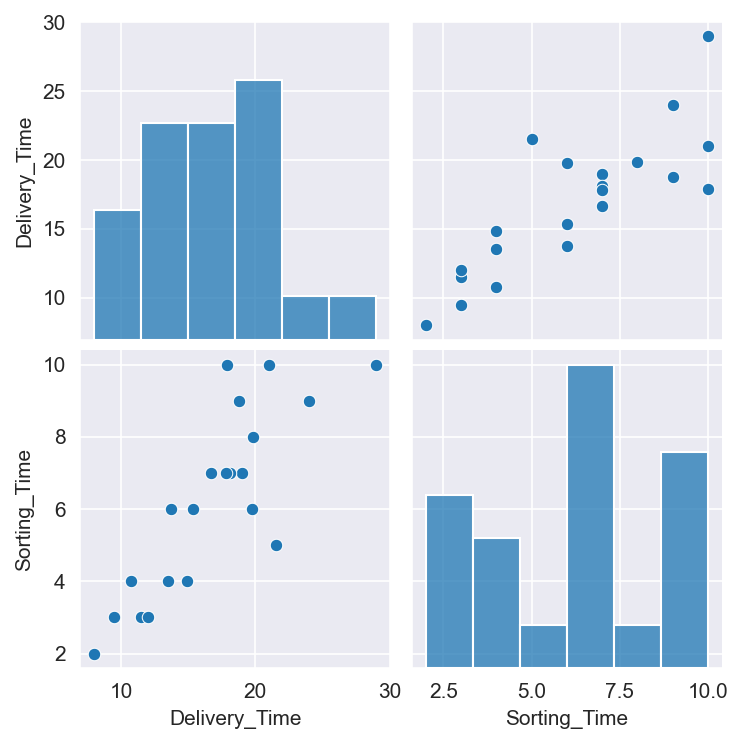

In [18]:
sns.set_style(style='darkgrid')
sns.pairplot(d_time)

In [19]:
model = smf.ols('Delivery_Time ~ Sorting_Time', data = d_time).fit() 

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        20:08:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
newdt = pd.DataFrame({
    'Sorting_Time' : [3,4,6,5,8,7,9]
})
newdt

,Sorting_Time
0,3
1,4
2,6
3,5
4,8
5,7
6,9


In [22]:
model.predict(newdt)

0    11.529794
1    13.178814
2    16.476853
3    14.827833
4    19.774893
5    18.125873
6    21.423913
dtype: float64

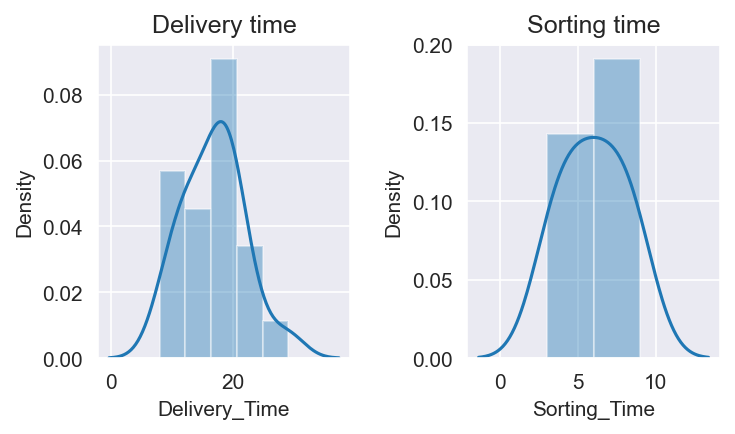

In [23]:
plt.subplot(1,2,1)
sns.distplot(d_time['Delivery_Time'])
plt.title('Delivery time')

plt.subplot(1,2,2)
sns.distplot(newdt['Sorting_Time'])
plt.title('Sorting time')

plt.tight_layout()

In [24]:
#Data Transformation

# Transformation 1: Log Transformation

In [25]:
d_time['log_Delivery'] = np.log(d_time['Delivery_Time'])
d_time['log_Sorting'] = np.log(d_time['Sorting_Time'])
d_time

,Delivery_Time,Sorting_Time,log_Delivery,log_Sorting
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


<AxesSubplot:xlabel='log_Sorting', ylabel='Density'>

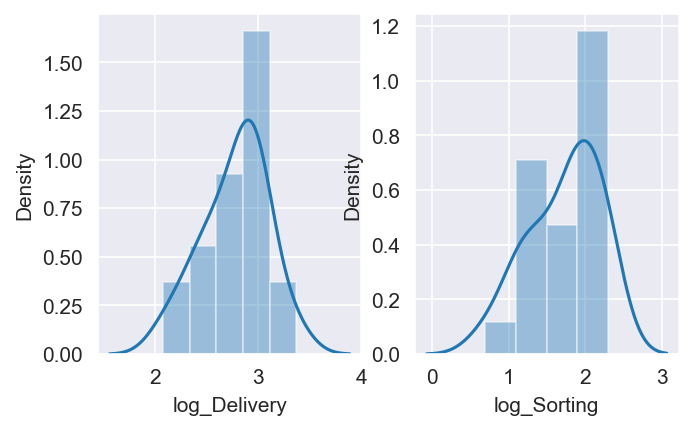

In [26]:
plt.subplot(1,2,1)
sns.distplot(d_time['log_Delivery'])

plt.subplot(1,2,2)
sns.distplot(d_time['log_Sorting'])

In [27]:
d_time['log_Delivery'].skew()

-0.4512901148522999

In [28]:
d_time['log_Sorting'].skew()

-0.6052357185134765

In [29]:
modellog = smf.ols('log_Delivery ~ log_Sorting', data = d_time).fit() 

In [30]:
modellog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_Delivery   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           1.60e-07
Time:                        20:08:09   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7420      0.133     13.086      0.000       1.463       2.021
log_Sorting     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformation 2: Sqrt Transformation

In [31]:
d_time['sqrt_Delivery'] = np.sqrt(d_time['Delivery_Time'])

In [32]:
d_time['sqrt_Sorting'] = np.sqrt(d_time['Sorting_Time'])
d_time.head()

,Delivery_Time,Sorting_Time,log_Delivery,log_Sorting,sqrt_Delivery,sqrt_Sorting
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278


In [33]:
modelsqrt = smf.ols('sqrt_Delivery ~ sqrt_Sorting', data = d_time).fit() 

In [34]:
modelsqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqrt_Delivery   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           8.48e-07
Time:                        20:08:09   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6135      0.349      4.628      0.000       0.884       2.343
sqrt_Sorting     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='sqrt_Sorting', ylabel='Density'>

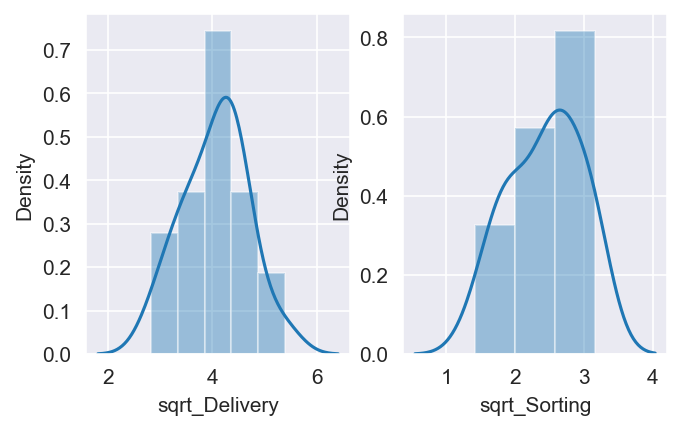

In [35]:
plt.subplot(1,2,1)
sns.distplot(d_time['sqrt_Delivery'])

plt.subplot(1,2,2)
sns.distplot(d_time['sqrt_Sorting'])

# Transformation 3: Standardization

In [36]:
mean_d_time = d_time['Delivery_Time'].mean()
std_d_time = d_time['Delivery_Time'].std()

In [37]:
d_time['std_Delivery'] = (d_time['Delivery_Time'] - mean_d_time) / std_d_time

In [38]:
mean_s_time = d_time['Sorting_Time'].mean()
std_s_time = d_time['Sorting_Time'].std()

In [39]:
d_time['std_Sorting'] = (d_time['Sorting_Time'] - mean_s_time) / std_s_time

In [40]:
d_time.head()

,Delivery_Time,Sorting_Time,log_Delivery,log_Sorting,sqrt_Delivery,sqrt_Sorting,std_Delivery,std_Sorting
0,21.00,10,3.044522,2.302585,4.582576,3.162278,0.829385,1.498616
1,13.50,4,2.602690,1.386294,3.674235,2.000000,-0.648476,-0.861704
2,19.75,6,2.983153,1.791759,4.444097,2.449490,0.583075,-0.074931
3,24.00,9,3.178054,2.197225,4.898979,3.000000,1.420530,1.105229
4,29.00,10,3.367296,2.302585,5.385165,3.162278,2.405771,1.498616


In [41]:
modelstd = smf.ols('std_Delivery ~ Sorting_Time', data = d_time).fit() 

In [42]:
modelstd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           std_Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        20:08:11   Log-Likelihood:                -17.247
No. Observations:                  21   AIC:                             38.49
Df Residuals:                      19   BIC:                             40.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.0115      0.339     -5.929      0.000      -2.722      -1.301
Sorting_Time     0.3249      0.051      6.387      0.000       0.218       0.431
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformation 4: Power Transformation

In [43]:
d_time['pow_Delivery'] = d_time['Delivery_Time'] ** 0.5

In [44]:
d_time['pow_Sorting'] = d_time['Sorting_Time'] ** 0.5

In [45]:
model_pow = smf.ols('pow_Delivery ~ pow_Sorting', data=d_time).fit()

In [46]:
model_pow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pow_Delivery   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           8.48e-07
Time:                        20:08:12   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6135      0.349      4.628      0.000       0.884       2.343
pow_Sorting     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Selecting Log Transformation

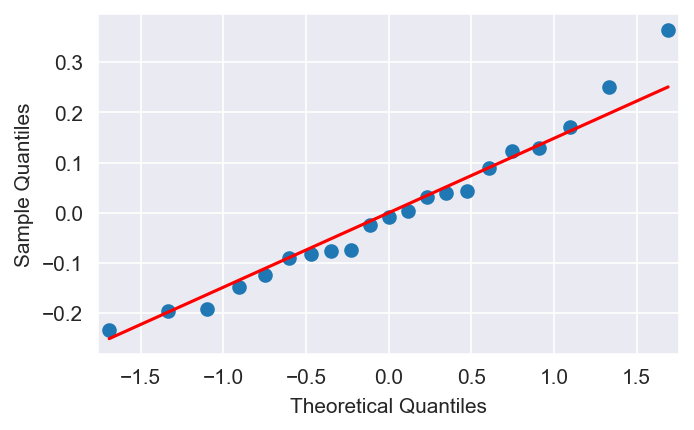

In [47]:
residuals = modellog.resid

fig = sm.qqplot(residuals, line='s')
plt.show()

eval_env: 1


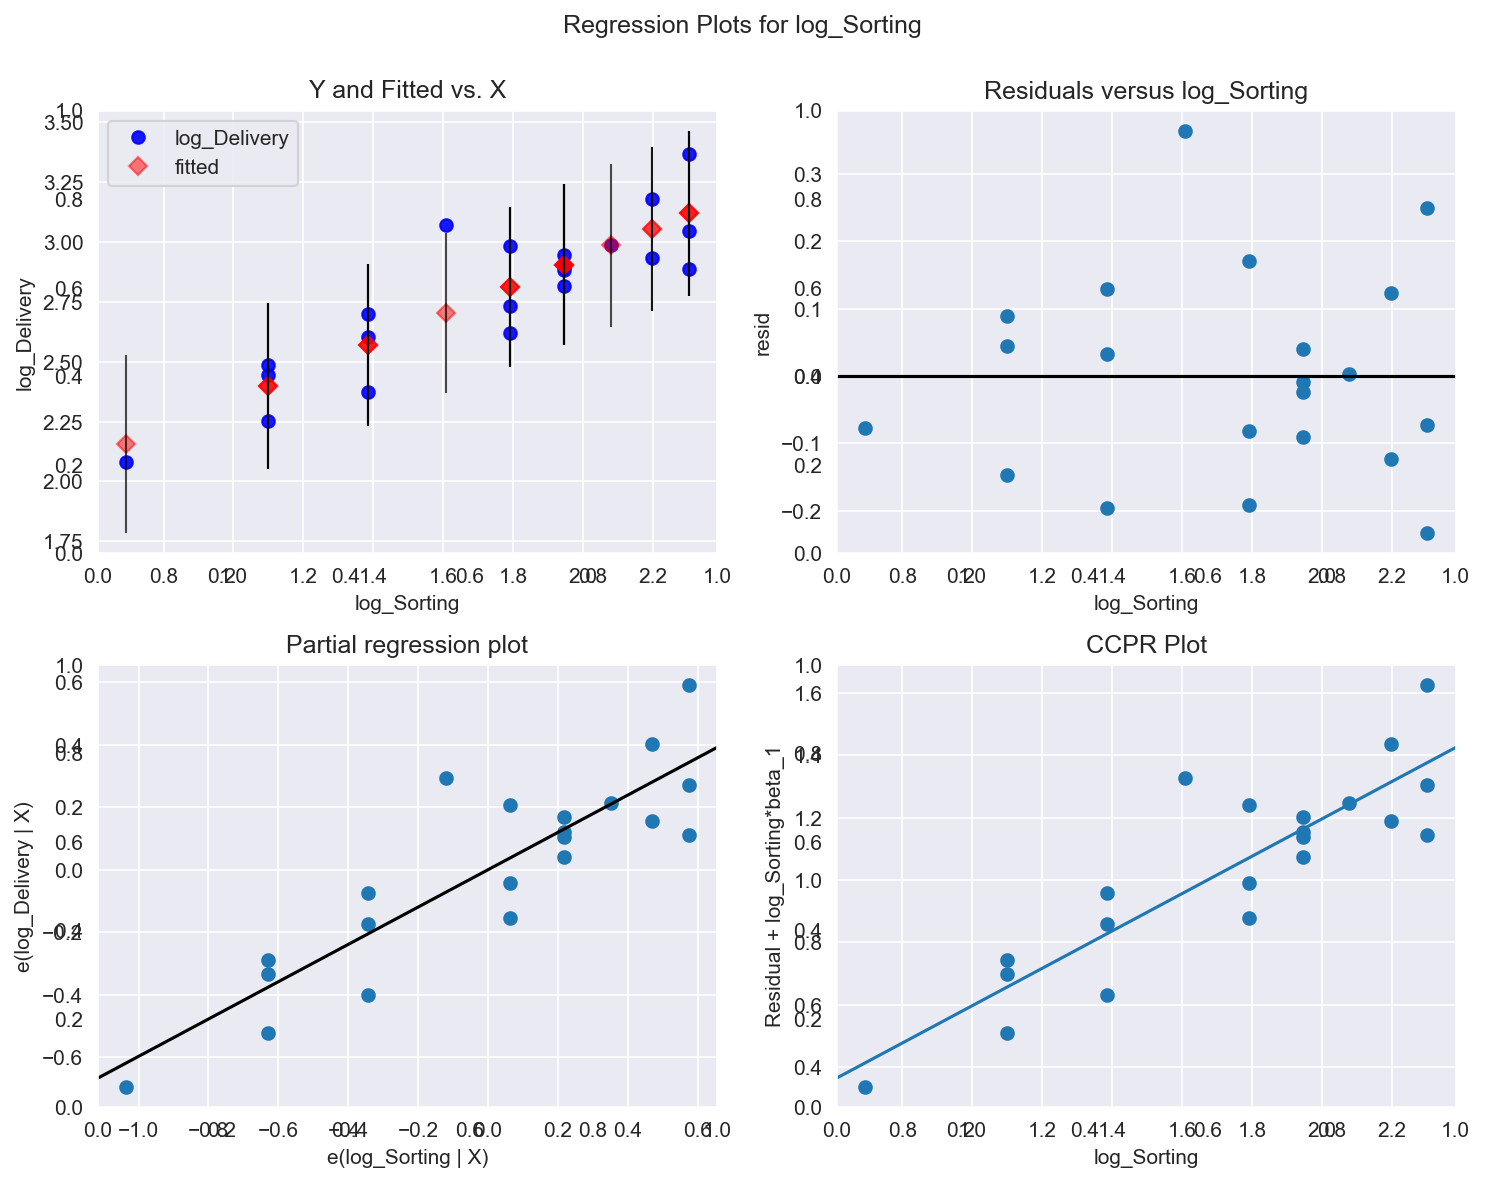

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sm.graphics.plot_regress_exog(modellog, 'log_Sorting', fig=fig)
plt.show()

In [49]:
new_sorting_time = pd.DataFrame({'Sorting_Time': [6,20, 18, 23, 23,11,11,12, 28, 27, 26, 25, 24,24,5,15,3,4,6,7,8.5,2,2,5]})

new_sorting_time['log_Sorting'] = new_sorting_time['Sorting_Time'].apply(lambda x: math.log(x))

new_delivery_time = modellog.predict(new_sorting_time[['log_Sorting']])

predictions_dt = pd.DataFrame({'Sorting_Time': new_sorting_time['Sorting_Time'], 'Delivery_Time': new_delivery_time})

predictions_dt.head()

,Sorting_Time,Delivery_Time
0,6.0,2.812603
1,20.0,3.532004
2,18.0,3.469049
3,23.0,3.615515
4,23.0,3.615515


In [50]:
new_sorting_time = pd.DataFrame({'Sorting_Time': [6,20, 18, 23, 23,11,11,12, 28, 27, 26, 25, 24,24,5,15,3,4,6,7,8.5,2,2,5]})

new_sorting_time['log_Sorting'] = new_sorting_time['Sorting_Time'].apply(lambda x: math.log(x))

new_delivery_time_log = modellog.predict(new_sorting_time[['log_Sorting']])

new_delivery_time = np.exp(new_delivery_time_log)

predictions_dt = pd.DataFrame({'Sorting_Time': new_sorting_time['Sorting_Time'], 'Delivery_Time': new_delivery_time})

predictions_dt

,Sorting_Time,Delivery_Time
0,6.0,16.653216
1,20.0,34.192421
2,18.0,32.106187
3,23.0,37.170480
4,23.0,37.170480
5,11.0,23.921630
6,11.0,23.921630
7,12.0,25.198244
8,28.0,41.806578
9,27.0,40.907900


# Salary_hike -> Build a prediction model for Salary_hike

In [51]:
salary_data = pd.read_csv("Salary_Data.csv")

In [52]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [53]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


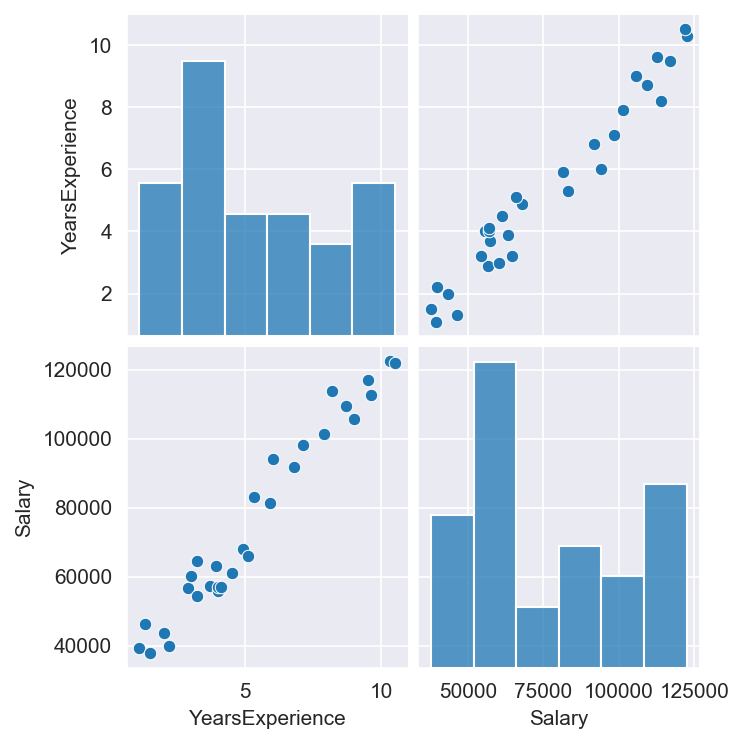

In [54]:
sns.pairplot(salary_data)
plt.show()

<AxesSubplot:>

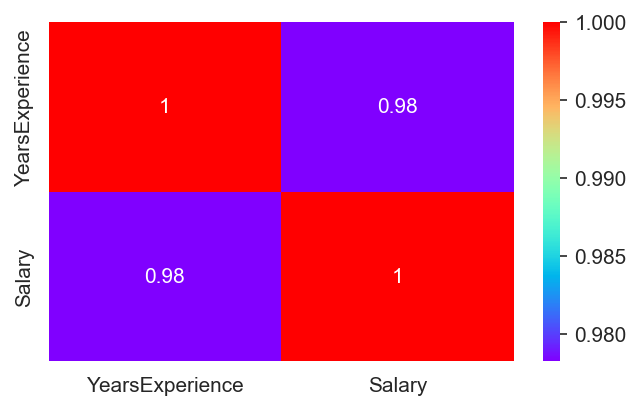

In [55]:
sns.heatmap(salary_data.corr(),annot=True,cmap='rainbow')

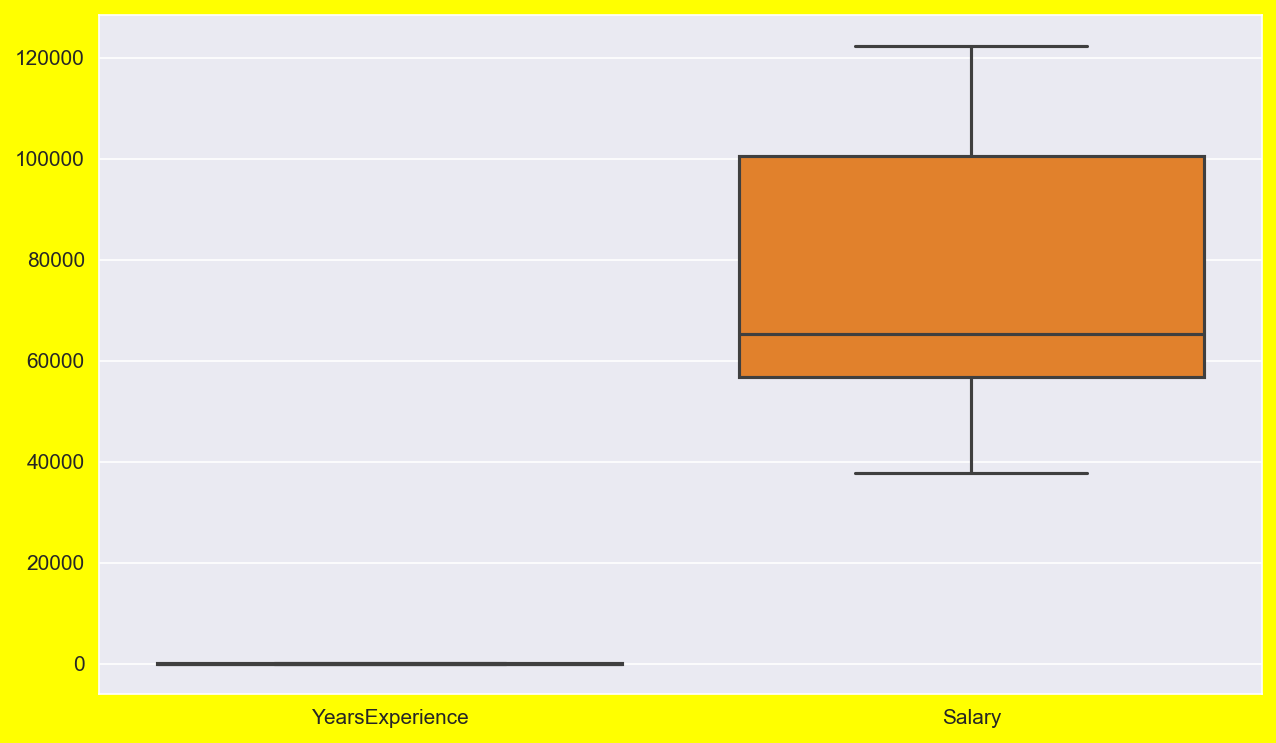

In [56]:
plt.figure(figsize=(10,6), facecolor="yellow")
sns.boxplot(data = salary_data)
plt.show()

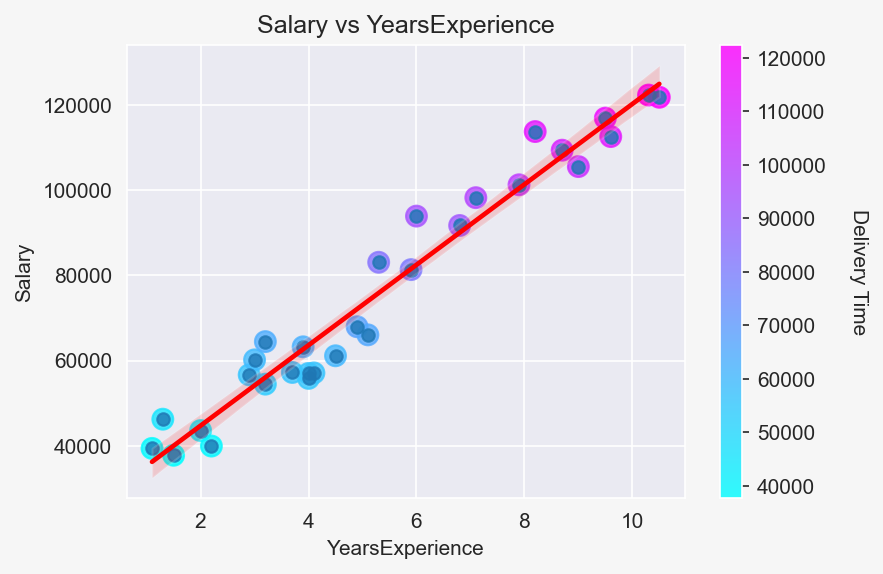

In [66]:
fig, ax = plt.subplots(figsize=(6, 4), facecolor='#f6f6f6')

scatter = ax.scatter(x='YearsExperience', y='Salary', data=salary_data, s=100, c=salary_data['Salary'], cmap='cool', alpha=0.8)
sns.regplot(x='YearsExperience', y='Salary', data=salary_data, line_kws={'color': 'red'}, ax=ax)

cbar = plt.colorbar(scatter)
cbar.set_label('Delivery Time', rotation=270, labelpad=20)

ax.set_xlabel('YearsExperience')
ax.set_ylabel('Salary')
ax.set_title('Salary vs YearsExperience')

plt.show()

# Log Transformation

In [57]:
salary_data['log_salary'] = np.log(salary_data['Salary'])
modelsallog = smf.ols('log_salary ~ YearsExperience	', data = salary_data).fit() 
modelsallog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           7.03e-18
Time:                        20:08:21   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Squareroot Transformation

In [58]:
salary_data['sqrt_salary'] = np.sqrt(salary_data['Salary'])
modelsal_sqrt = smf.ols('sqrt_salary ~ YearsExperience', data = salary_data).fit() 
modelsal_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_salary   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           9.78e-20
Time:                        20:08:21   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Standardization transformation

In [59]:
mean_sal = salary_data['Salary'].mean()
std_sal = salary_data['Salary'].std()

In [60]:
salary_data['std_Salary'] = (salary_data['Salary'] - mean_sal) / std_sal

In [61]:
modelsal_std = smf.ols('std_Salary ~ YearsExperience', data = salary_data).fit() 
modelsal_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             std_Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        20:08:22   Log-Likelihood:                 5.1236
No. Observations:                  30   AIC:                            -6.247
Df Residuals:                      28   BIC:                            -3.445
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.8315      0.083    -22.090      0.000      -2.001      -1.662
YearsExperience     0.3447      0.014     24.950      0.000       0.316       0.373
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# PowerTransformation

In [62]:
salary_data['pow_Salary'] = salary_data['Salary'] ** 0.5
modelsal_pow = smf.ols('pow_Salary ~ YearsExperience', data=salary_data).fit()
modelsal_pow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pow_Salary   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           9.78e-20
Time:                        20:08:22   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Selecting Standardization Transformation

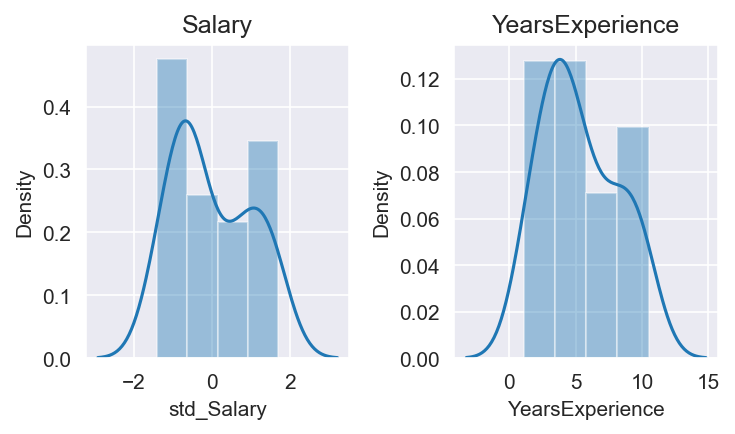

In [69]:
plt.subplot(1,2,1)
sns.distplot(salary_data['std_Salary'])
plt.title('Salary')

plt.subplot(1,2,2)
sns.distplot(salary_data['YearsExperience'])
plt.title('YearsExperience')

plt.tight_layout()

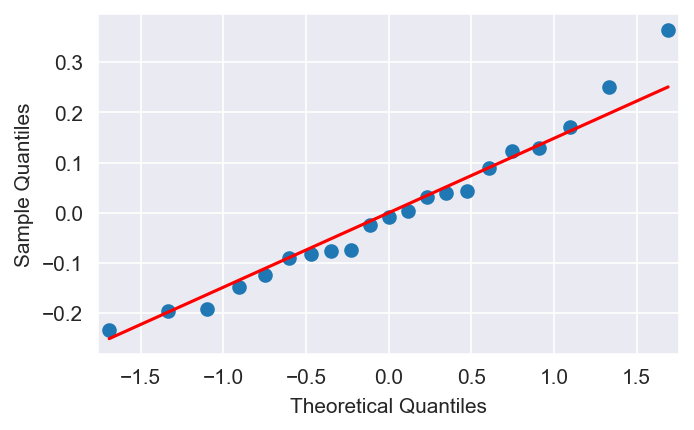

In [63]:
residuals1 = modelsal_std.resid

fig = sm.qqplot(residuals, line='s')
plt.show()

eval_env: 1


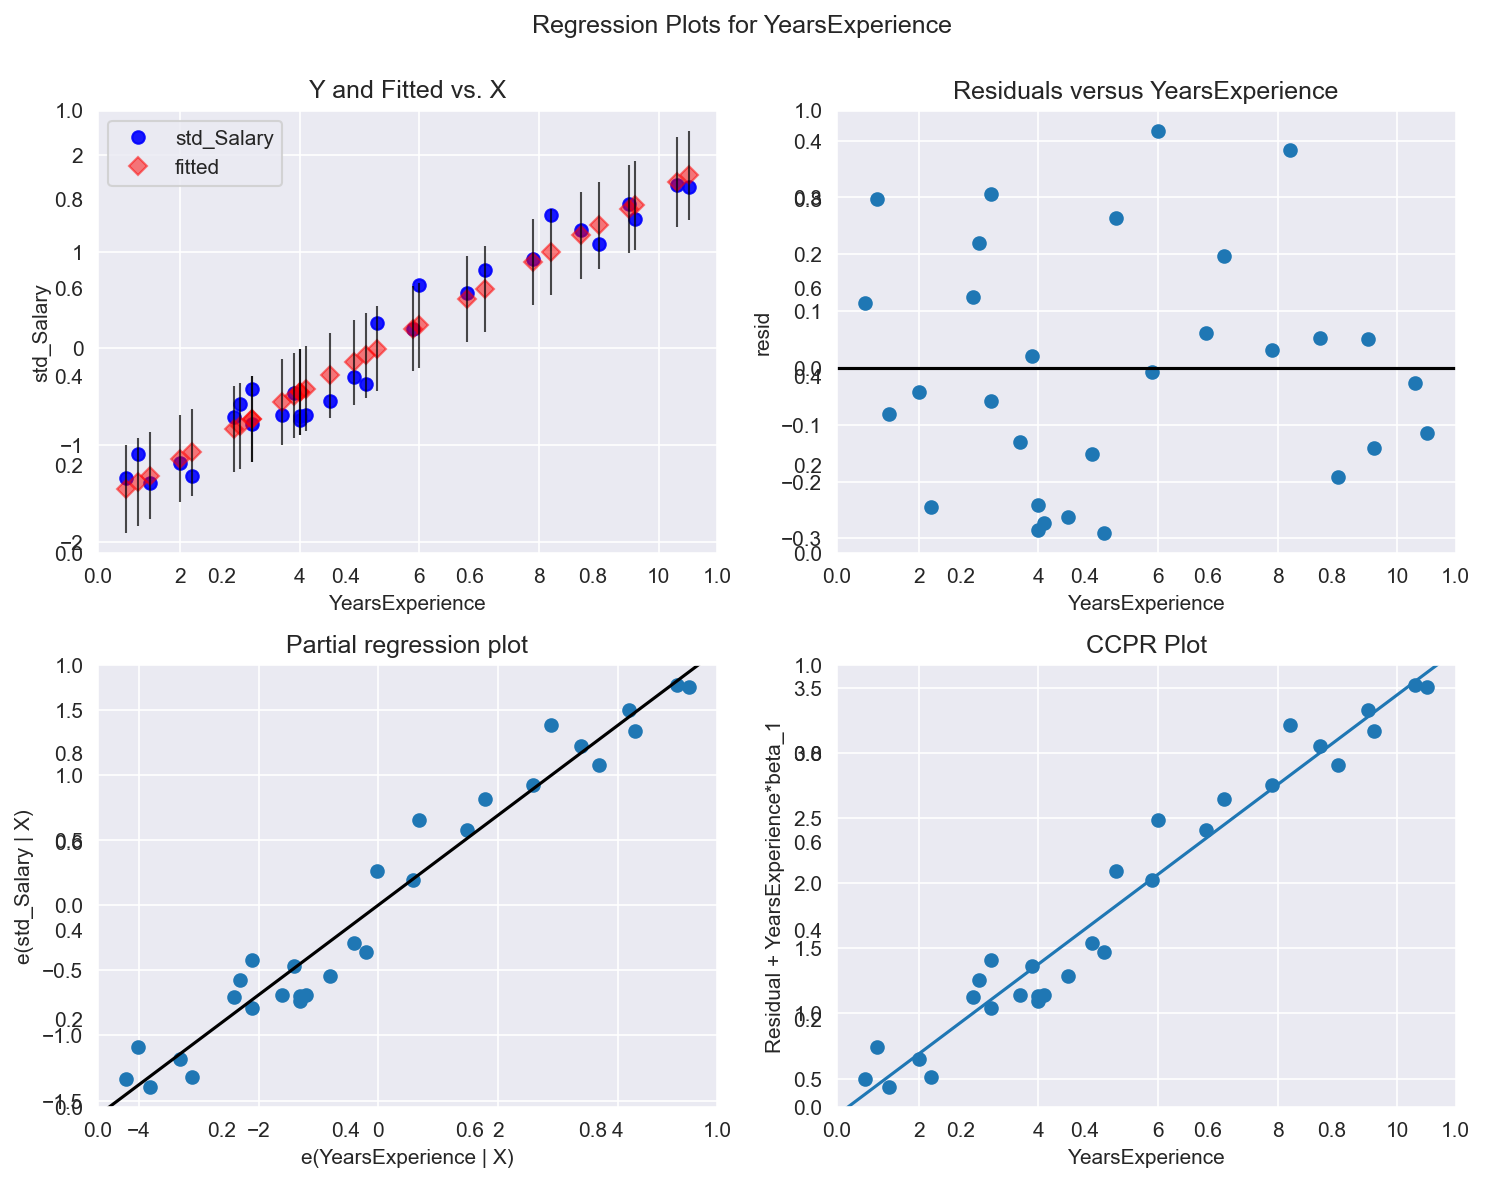

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sm.graphics.plot_regress_exog(modelsal_std, 'YearsExperience', fig=fig)
plt.show()

In [65]:
new_years_Exp = pd.DataFrame({'YearsExperience': [5,6,3,9,7,8,2]})

new_salary = modelsal_std.predict(new_years_Exp[['YearsExperience']])

new_sal = new_salary * std_sal + mean_sal

pred_sal = pd.DataFrame({'YearsExperience': new_years_Exp['YearsExperience'], 'Salary': new_sal})

pred_sal

,YearsExperience,Salary
0,5,73042.011806
1,6,82491.974127
2,3,54142.087163
3,9,110841.861092
4,7,91941.936449
5,8,101391.898770
6,2,44692.124842


 I will definitely keep these points in mind and work on them to improve the performance of my models. I will also explore techniques such as sentiment and emotional analysis, Ngrams, and feature extraction using spacy or gensim to gain better insights into the dataset. Thank you again for your valuable feedback.